In [1]:
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
# from collections import defaultdict
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./tweet_emotions.csv")
df.head()

,text,label
0,@tiffanylue i know i was listenin to bad habi...,empty
1,Layin n bed with a headache ughhhh...waitin o...,sadness
2,Funeral ceremony...gloomy friday...,sadness
3,wants to hang out with friends SOON!,enthusiasm
4,@dannycastillo We want to trade with someone w...,neutral


In [3]:
total = df.isnull().sum()
total

text     0
label    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


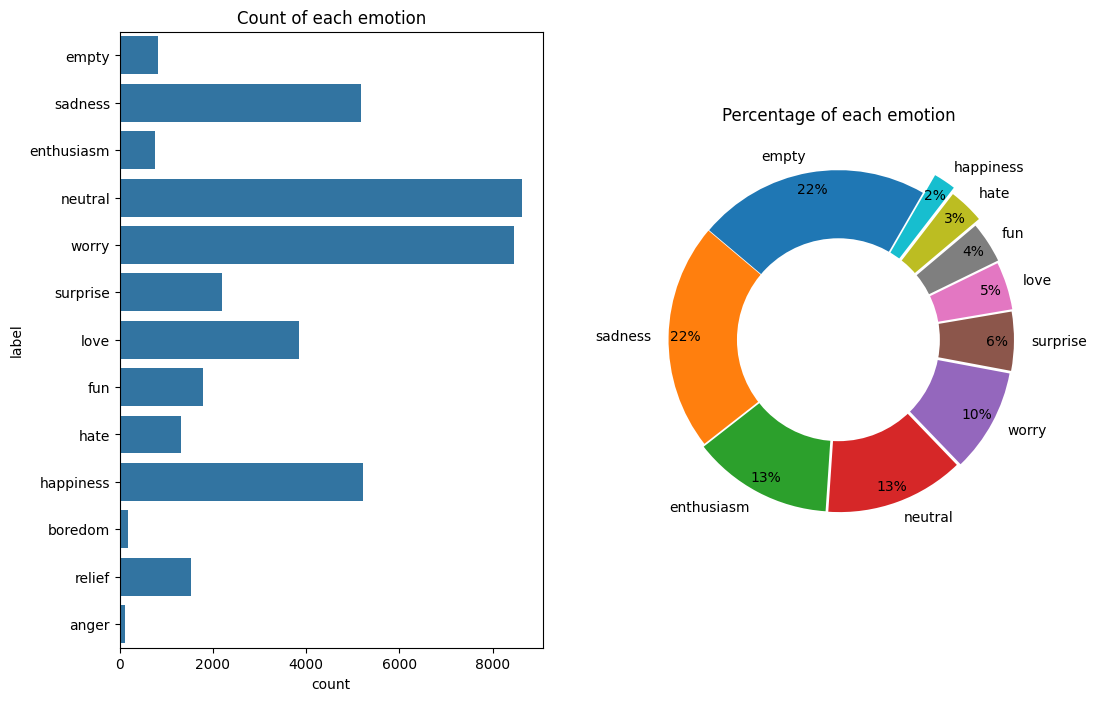

In [5]:
col = 'label'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
labels = list(df[col].dropna().unique())[:10]
sizes = df[col].value_counts()[:10]
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

In [6]:
df['char_length'] = df['text'].apply(lambda x : len(x))
df['token_length'] = df['text'].apply(lambda x : len(x.split(" ")))

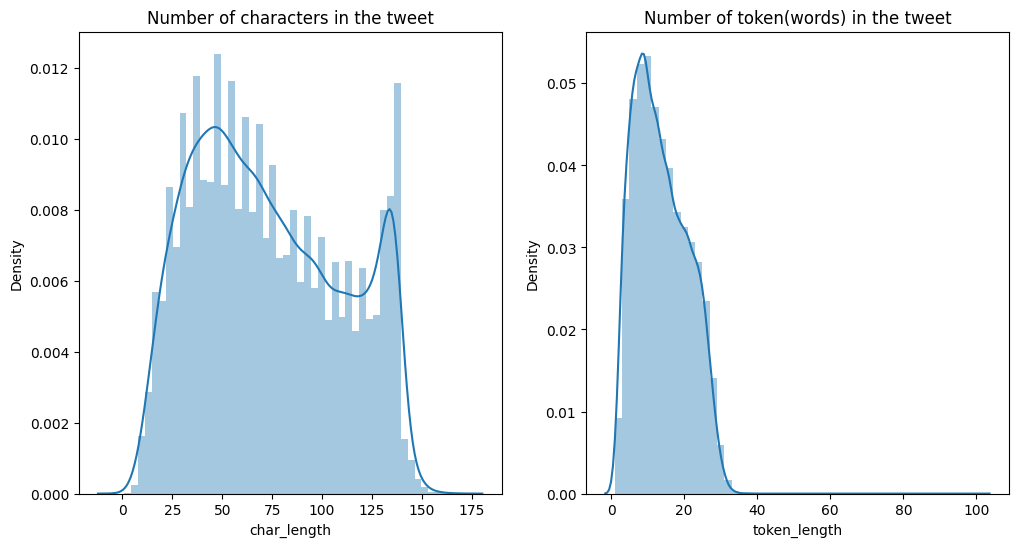

In [7]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(df['char_length'], ax=ax1)
sns.distplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

In [8]:
# fig, ax = plt.subplots(figsize=(16,8))
# for sentiment in df['label'].value_counts().sort_values()[-13:].index.tolist():
#     #print(sentiment)
#     sns.kdeplot(df[df['label']==sentiment]['char_length'],ax=ax, label=sentiment)
# ax.legend()
# ax.set_title("Distribution of character length sentiment-wise")
# plt.show()

In [9]:
# fig, ax = plt.subplots(figsize=(8,6))
# for sentiment in df['label'].value_counts().sort_values()[-13:].index.tolist():
#     #print(sentiment)
#     sns.kdeplot(df[df['label']==sentiment]['token_length'],ax=ax, label=sentiment)
# ax.legend()
# ax.set_title("Distribution of token length sentiment-wise [Top 5 sentiments]")
# plt.show()

In [10]:
avg_df = df.groupby('label').agg({'char_length':'mean', 'token_length':'mean'})

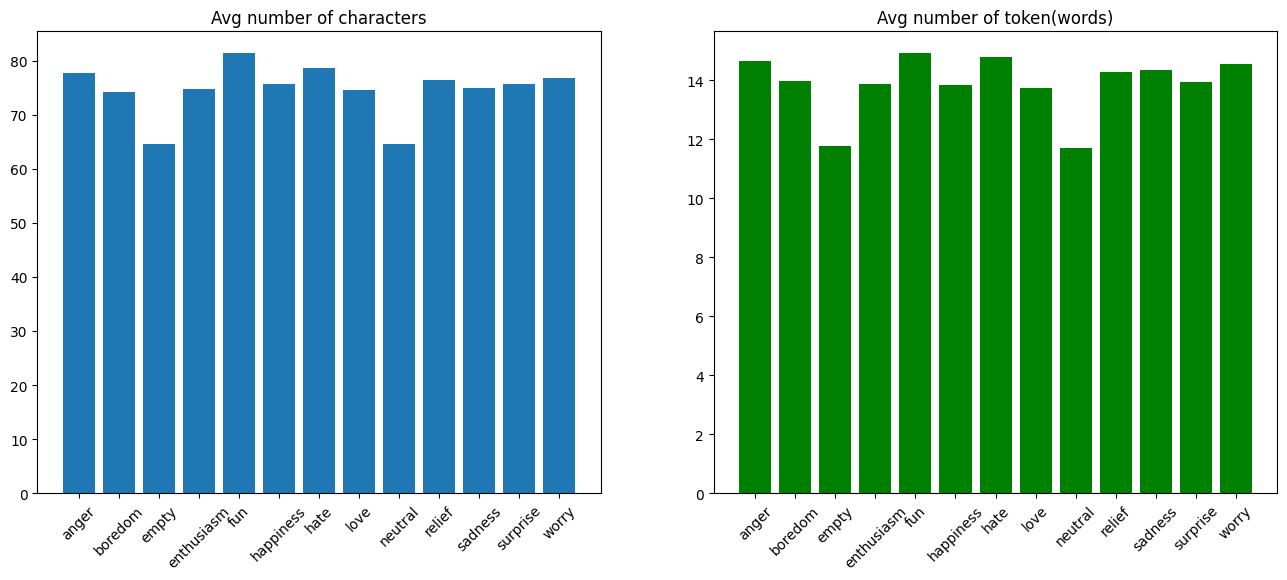

In [11]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)
plt.show()

Empty and Neutral categorized tweets have the smallest length tweets 

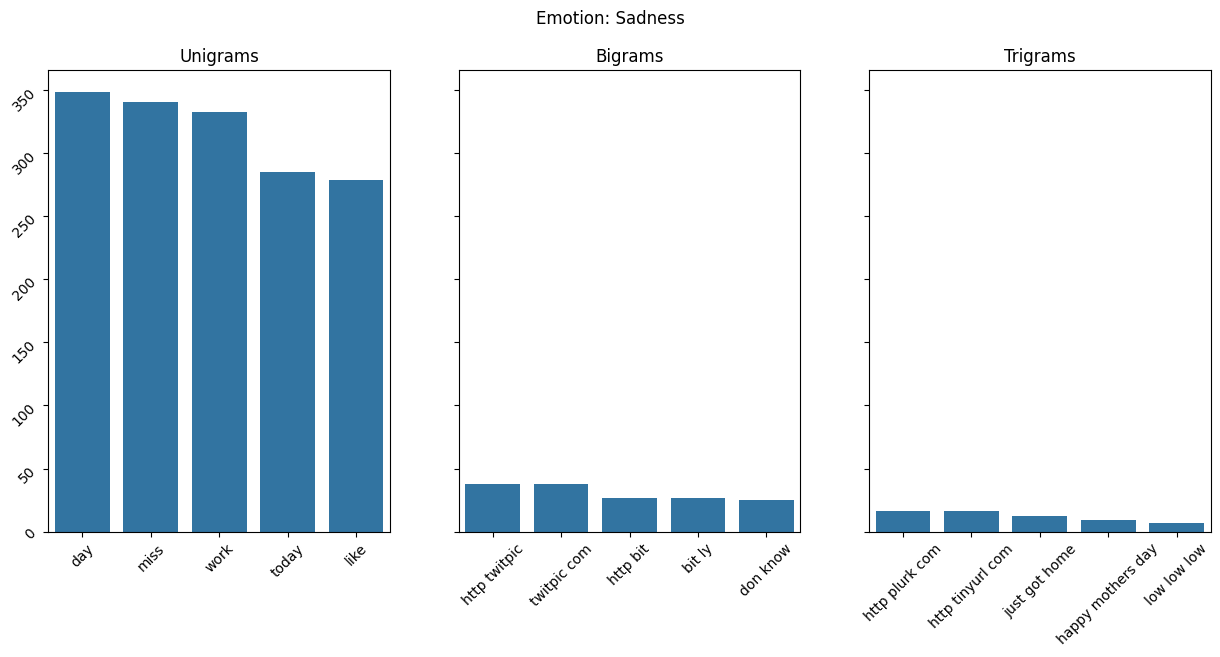

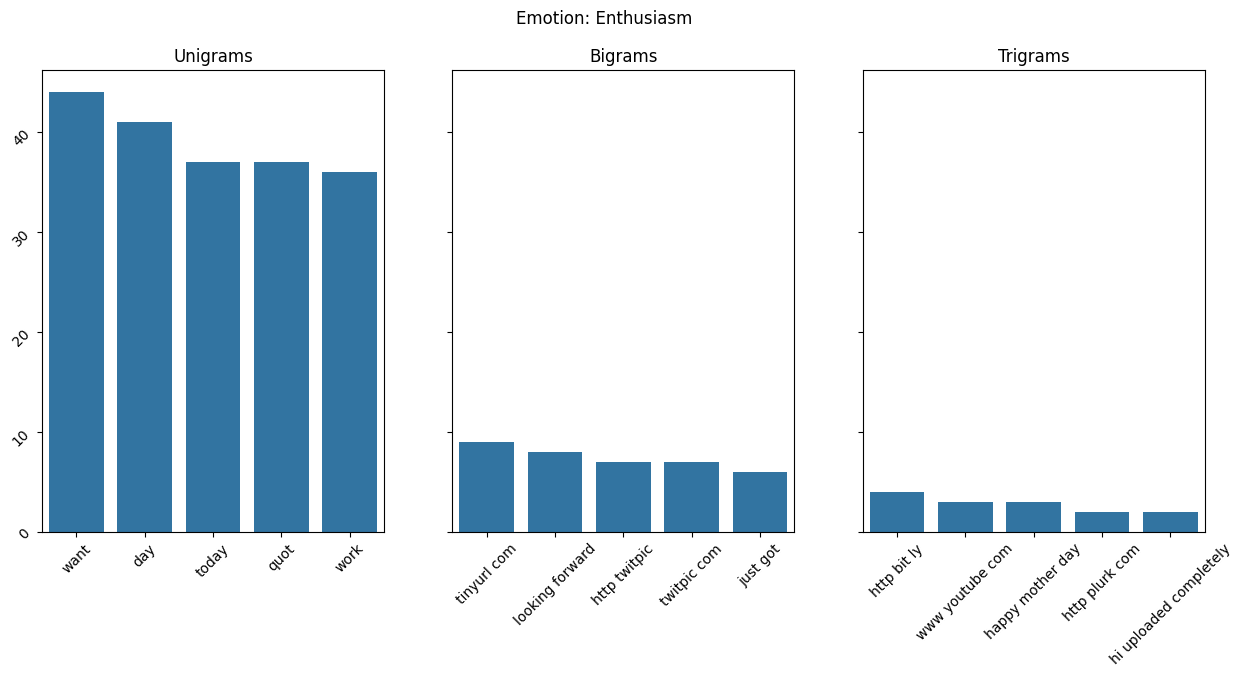

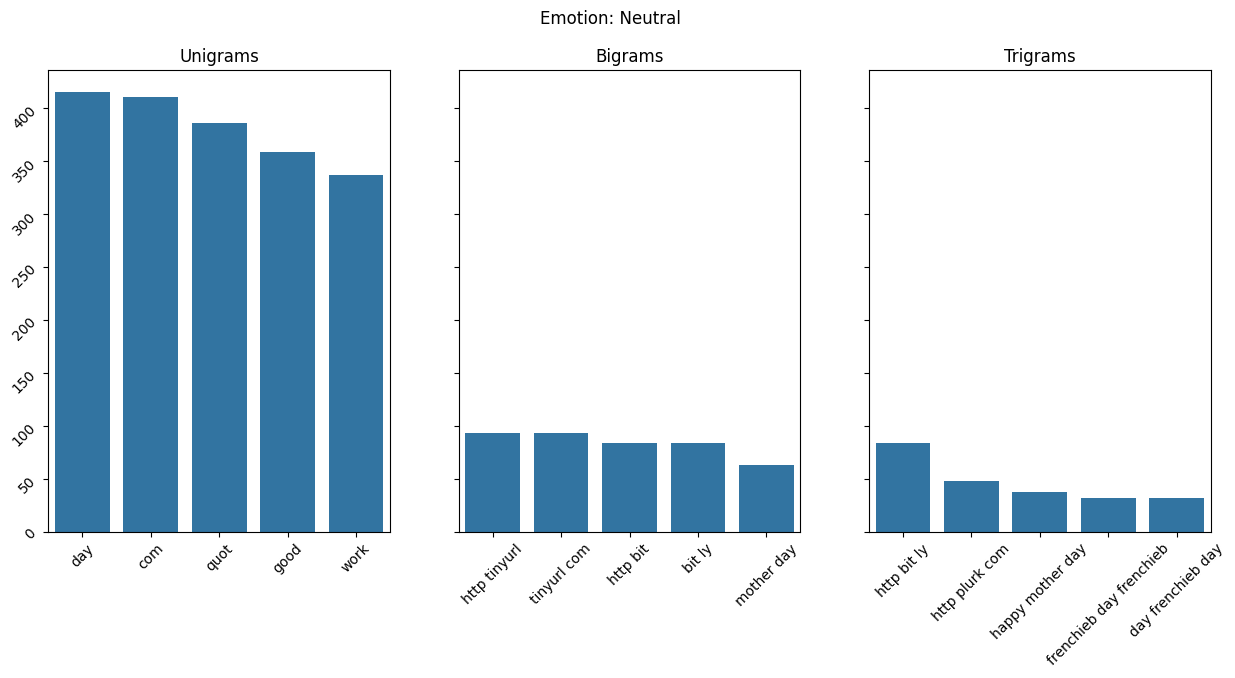

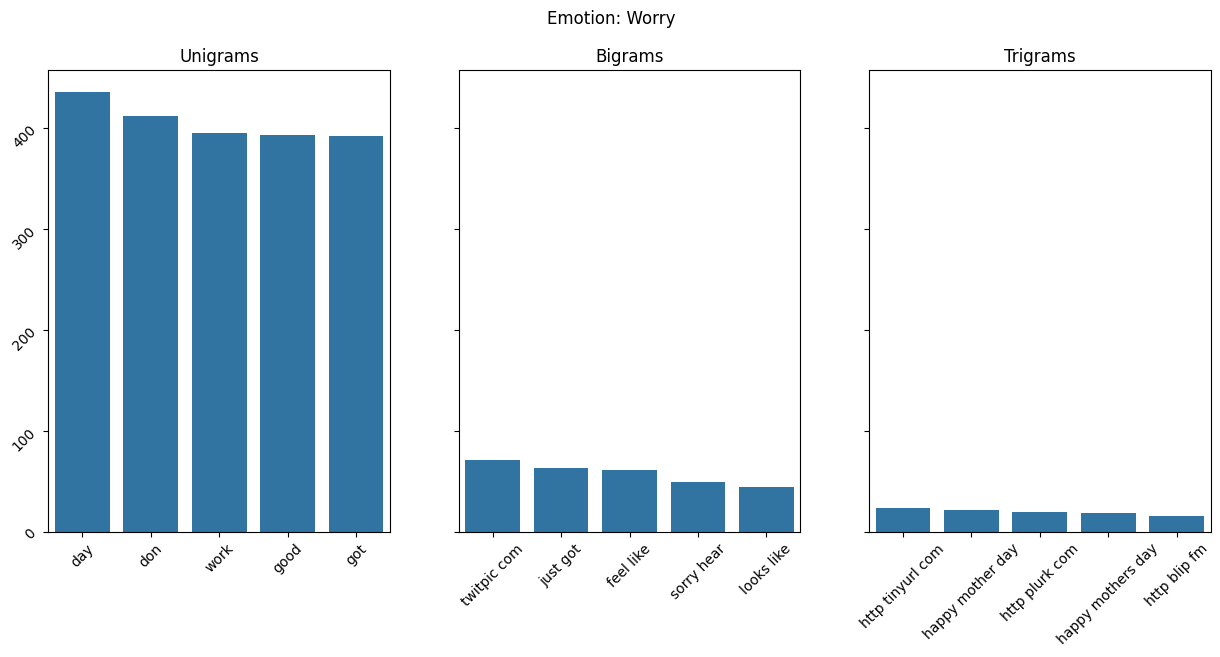

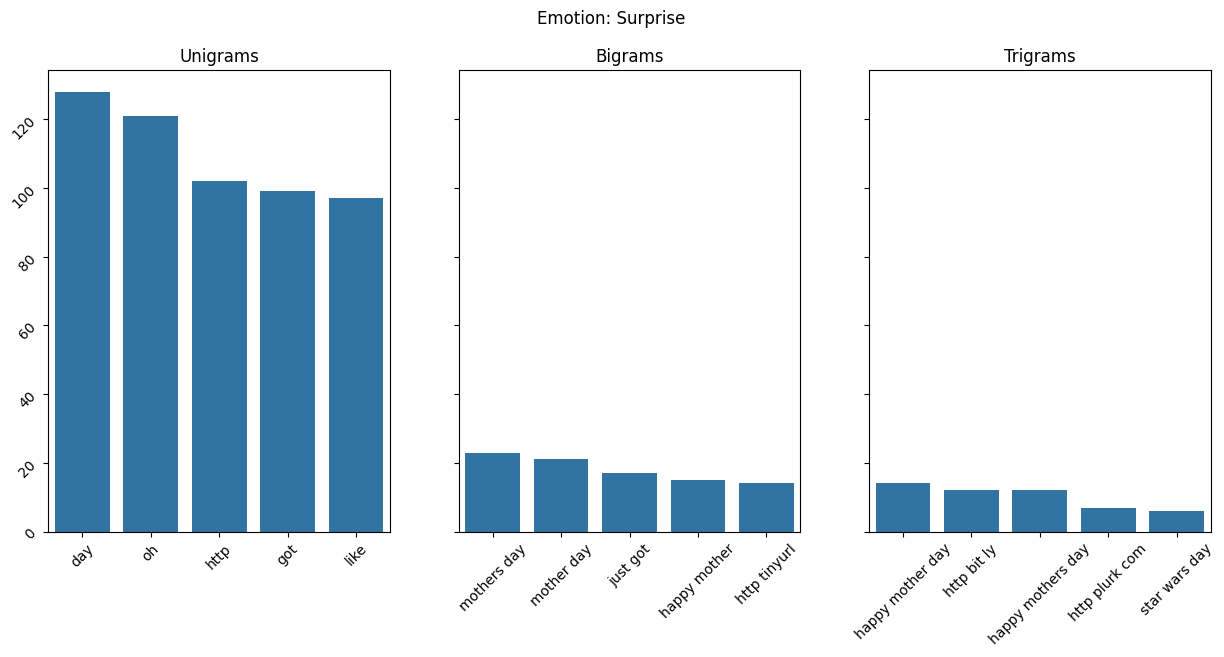

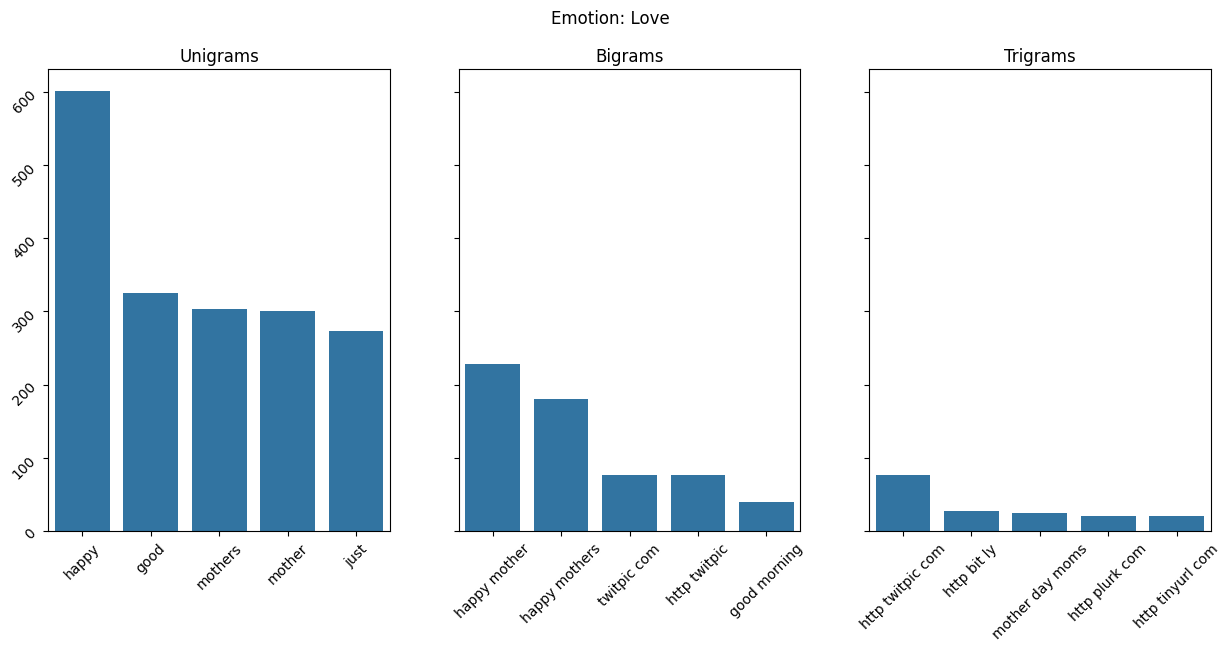

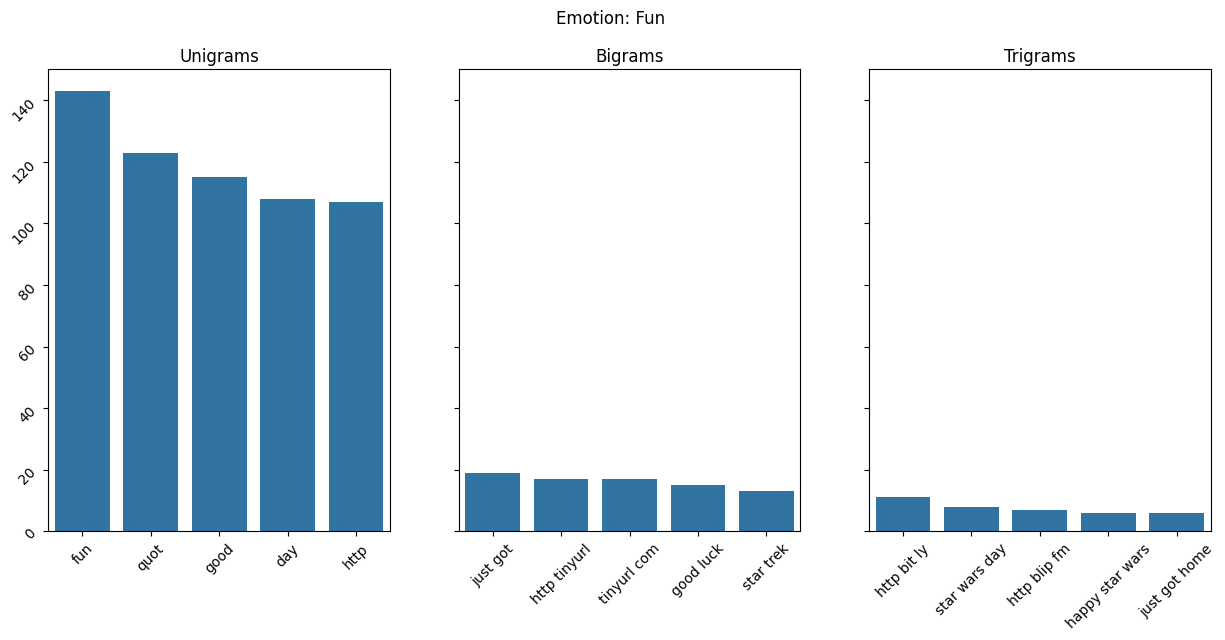

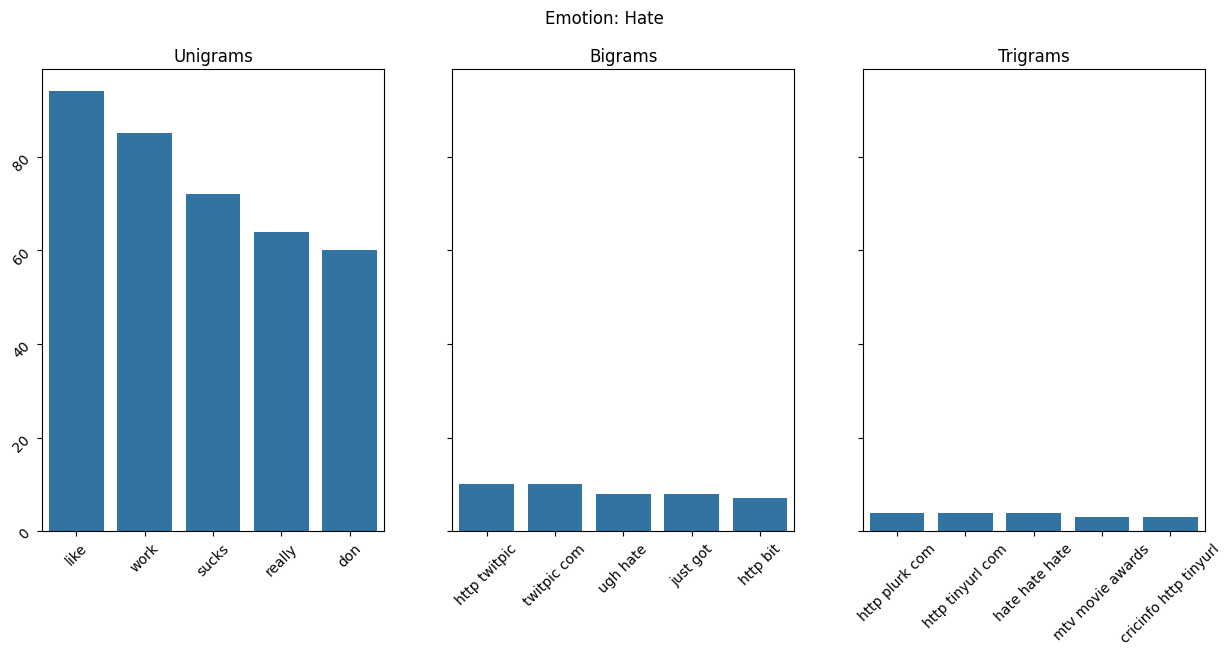

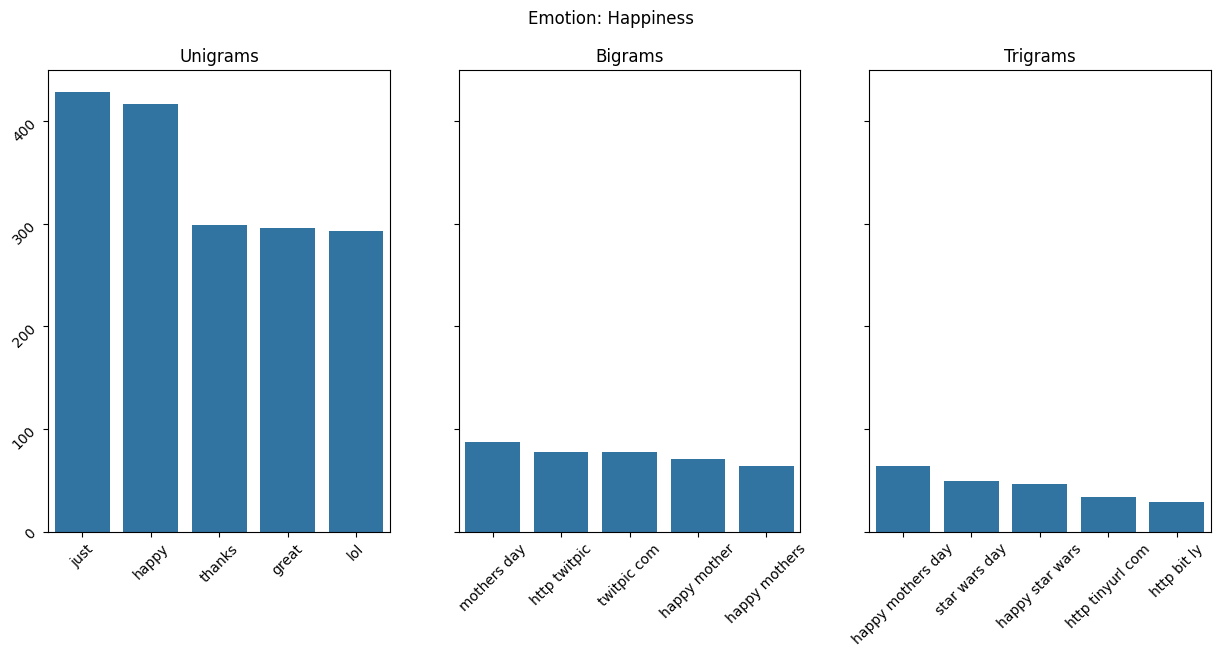

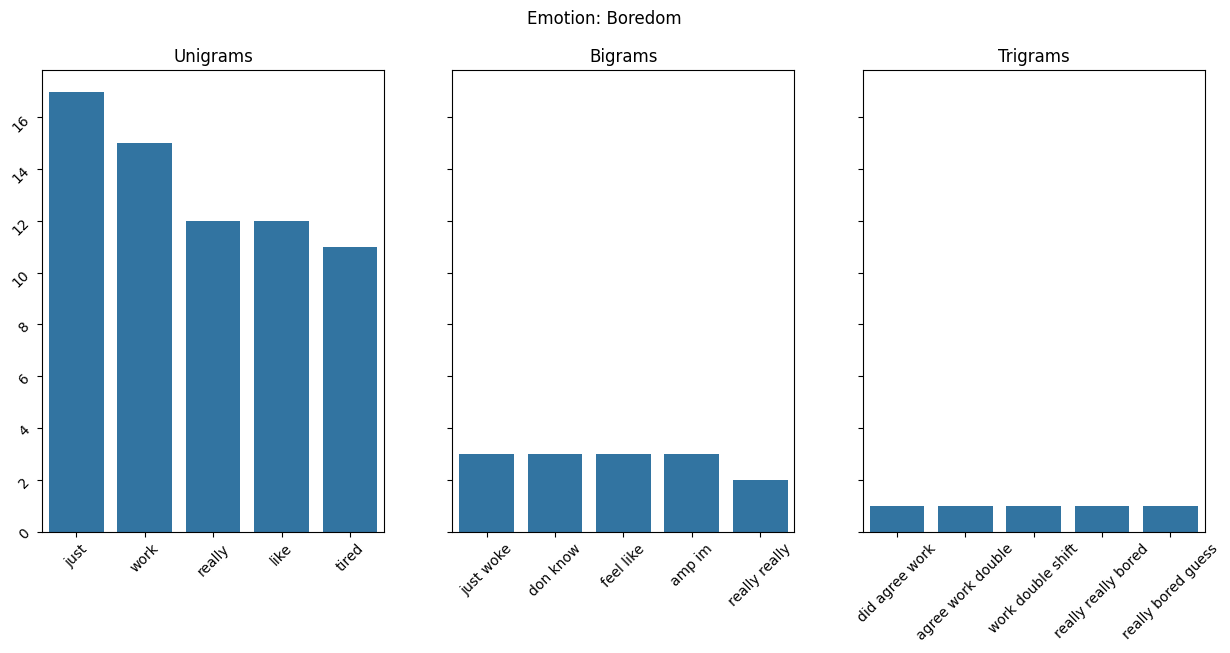

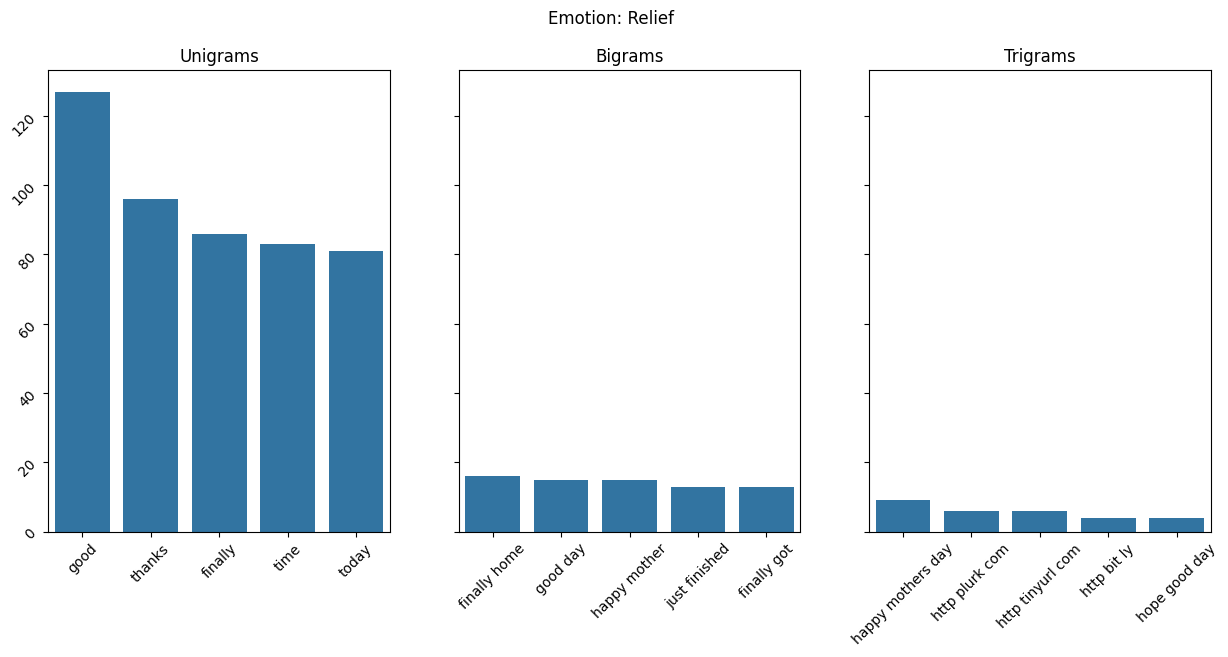

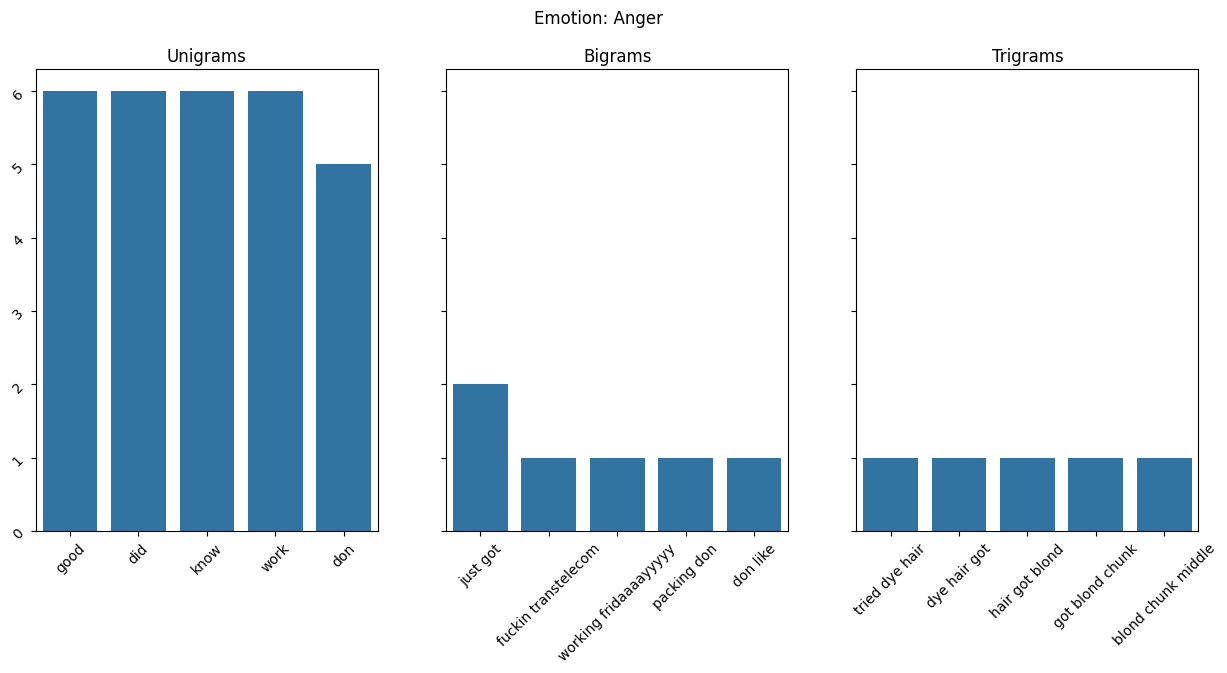

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

def get_top_n_gram(corpus, ngram_range, n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Specify the emotions
emotions = ['sadness', 'enthusiasm', 'neutral', 'worry', 'surprise', 'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger']

# Loop through each emotion
for emotion in emotions:
    emotion_data = df[df['label'] == emotion]['text']

    # Calculate unigrams, bigrams, and trigrams
    unigrams = get_top_n_gram(emotion_data.values, (1, 1), 7)[2:]
    bigrams = get_top_n_gram(emotion_data.values, (2, 2), 7)[2:]
    trigrams = get_top_n_gram(emotion_data.values, (3, 3), 7)[2:]

    # Visualize the n-grams
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
    fig.suptitle(f'Emotion: {emotion.capitalize()}')

    sns.barplot(x=list(dict(unigrams).keys()), y=list(dict(unigrams).values()), ax=axes[0])
    axes[0].set_title('Unigrams')
    axes[0].tick_params(labelrotation=45)

    sns.barplot(x=list(dict(bigrams).keys()), y=list(dict(bigrams).values()), ax=axes[1])
    axes[1].set_title('Bigrams')
    axes[1].tick_params(labelrotation=45)

    sns.barplot(x=list(dict(trigrams).keys()), y=list(dict(trigrams).values()), ax=axes[2])
    axes[2].set_title('Trigrams')
    axes[2].tick_params(labelrotation=45)


    # Show the plots
    plt.show()
